In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# load data into dataframe
df = pd.read_csv('../data/diskbenchmarks.csv')

## Reformating data
# create new column where all bandwidth is in MB/s
df.loc[df['unit'] == 'GB/s', 'bandwidth'] *= 1024
df.loc[df['unit'] == 'GB/s', 'unit'] = 'MB/s'
df.loc[df['device'] == '/dev/shm/benchfile.txt', 'device'] = 'tmpfs'
df.loc[df['device'] == '/tmp/benchfile.txt', 'device'] = 'SSD'
df.loc[df['device'] == '/mnt/lustre/vhs/benchfile.txt', 'device'] = 'Lustre'

order = ['tmpfs', 'SSD', 'Lustre']
df.head()

,device,mode,bandwidth,unit
0,SSD,write,426.0,MB/s
1,SSD,read,503.0,MB/s
2,SSD,cached,6451.2,MB/s
3,tmpfs,write,3993.6,MB/s
4,tmpfs,read,7372.8,MB/s


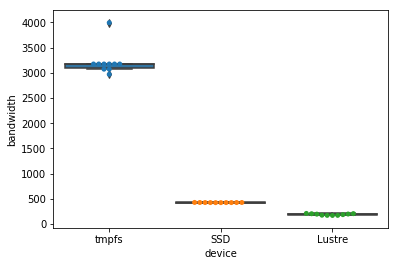

In [3]:
## WRITE BW
ax = sns.boxplot(x="device", y="bandwidth", data=df[df['mode'] == 'write'], order=order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df[df['mode'] == 'write'], order=order)

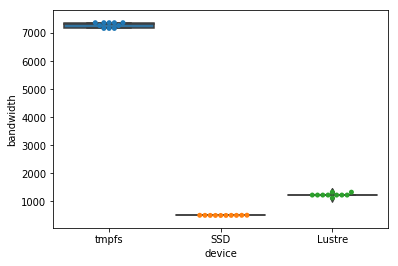

In [4]:
## READ BW
ax = sns.boxplot(x="device", y="bandwidth", data=df[df['mode'] == 'read'], order=order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df[df['mode'] == 'read'], order=order)

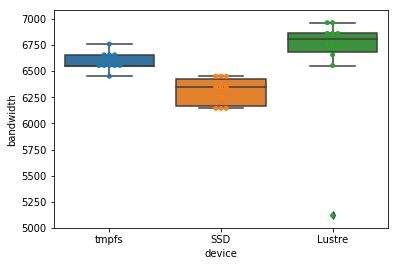

In [5]:
## CACHED READ BW
ax = sns.boxplot(x="device", y="bandwidth", data=df[df['mode'] == 'cached'], order=order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df[df['mode'] == 'cached'], order=order)

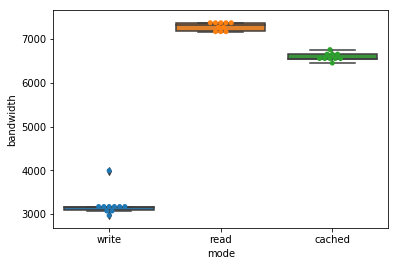

In [6]:
## TMPFS Performance
ax = sns.boxplot(x="mode", y="bandwidth", data=df[df['device'] == 'tmpfs'])
ax = sns.swarmplot(x="mode", y="bandwidth", data=df[df['device'] == 'tmpfs'])

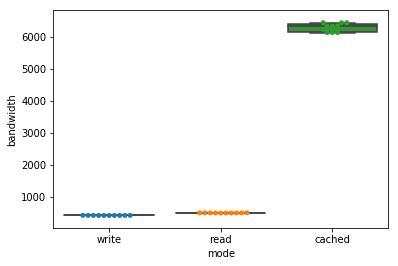

In [7]:
## SSD Performance
ax = sns.boxplot(x="mode", y="bandwidth", data=df[df['device'] == 'SSD'])
ax = sns.swarmplot(x="mode", y="bandwidth", data=df[df['device'] == 'SSD'])

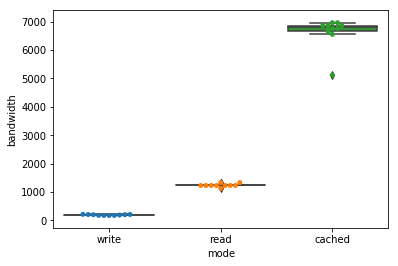

In [8]:
## Lustre Performance
ax = sns.boxplot(x="mode", y="bandwidth", data=df[df['device'] == 'Lustre'])
ax = sns.swarmplot(x="mode", y="bandwidth", data=df[df['device'] == 'Lustre'])